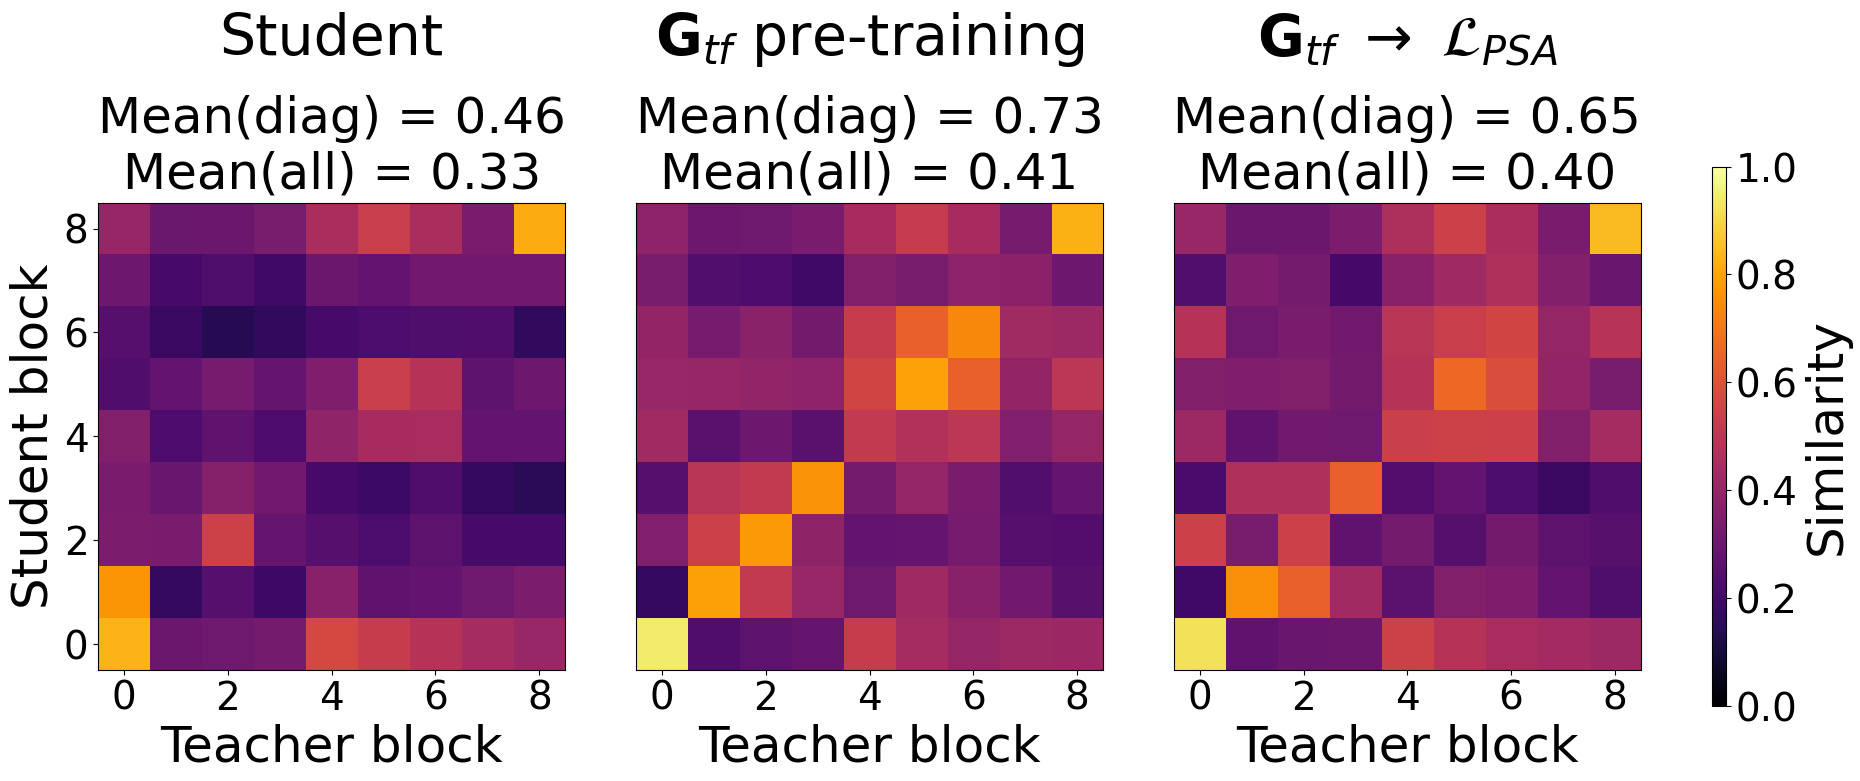

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

mat_dict = {
    # [ref]_[compared]
    't_s': 'cka_matrices/ckaTeacher_student62kAlone.npy',
    't_sInit': 'cka_matrices/ckaTeacher_student62kInitGTF.npy',
    't_sBest': 'cka_matrices/ckaTeacher_student62kBestKD.npy',
    's_s': 'cka_matrices/ckaSelf_student62kAlone.npy',
    'sBest_s': 'cka_matrices/ckaStudent62kBestKD_student62kAlone.npy',
}

cka_matrices = [np.load(mat_dict[mat_id], allow_pickle=True) for mat_id in ['t_s', 't_sInit', 't_sBest']]

plt.rc('axes')
fig = plt.figure(figsize=(21,7))
gs = gridspec.GridSpec(1, 4, width_ratios=[1, 1, 1, 0.03])

fontsize = 36
tick_values = [0, 2, 4, 6, 8]

axes = [fig.add_subplot(gs[i]) for i in range(3)]

names = ['Student', r'$\mathbf{G}_{tf}$ pre-training', r'$\mathbf{G}_{tf}$ $\rightarrow$ $\mathcal{L}_{PSA}$']

for idx, (ax, name, cka_mat) in enumerate(zip(axes, names, cka_matrices)):
    im = ax.imshow(cka_mat, cmap='inferno', origin='lower', vmin=0.0, vmax=1.0)

    ax.set_xticks(tick_values)

    if idx > 0:
        ax.set_yticks([])
    else:
        ax.set_yticks(tick_values)
    ax.tick_params(axis='both', labelsize=fontsize-8)

    ax.set_xlabel('Teacher block', fontsize=fontsize)
    
    mean_diag = np.mean(np.diag(cka_mat))
    mean_mat = np.mean(cka_mat)
    
    ax.text(0.5, 1.35,
            name,
            transform=ax.transAxes,
            ha="center",
            va="center",
            fontsize=fontsize + 5,)
    
    ax.text(0.5, 1.18,
            f"\nMean(diag) = {mean_diag:.2f}\nMean(all) = {mean_mat:.2f}", 
            transform=ax.transAxes,
            ha="center",
            va="center",
            fontsize=fontsize,)

axes[0].set_ylabel('Student block', fontsize=fontsize)

cbar_ax = fig.add_subplot(gs[3])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label("Similarity", fontsize=fontsize)
colorbar_ticks = [0., 0.2, 0.4, 0.6, 0.8, 1.]  # Custom tick values for the colorbar
cbar.set_ticks(colorbar_ticks)
cbar.ax.tick_params(labelsize=fontsize-8)

# plt.tight_layout()
plt.savefig('cka.pdf', bbox_inches='tight')
plt.show()